### Problem Statment
Use Netflix Movies and TV Shows dataset from Kaggle and perform following operations :
- Make a visualization showing the total number of movies watched by children
- Make a visualization showing the total number of standup comedies
- Make a visualization showing most watched shows.
- Make a visualization showing highest rated show
- Make a dashboard containing all of these above visualizations.

In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import re

In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
df.drop(index=df[df['date_added'].isnull()].index,inplace=True)
df.drop(index=df[df['rating'].isnull()].index,inplace=True)

In [7]:
df.drop(columns=['director','cast'],inplace=True)

In [8]:
df['country'] = df['country'].fillna(value=df['country'].mode()[0])

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(' ')[-1])
df['year_added'] = pd.to_numeric(df['year_added'])

In [11]:
df['type'].value_counts()

Movie      4257
TV Show    1957
Name: type, dtype: int64

In [12]:
df['rating'].value_counts()

TV-MA       2025
TV-14       1695
TV-PG        699
R            508
PG-13        286
NR           217
PG           184
TV-Y7        168
TV-G         149
TV-Y         142
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [13]:
target_audience = {
    'TV-PG': 'Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Kids',
    'TV-Y7': 'Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [14]:
df['target_audience'] = df['rating'].apply(lambda x: target_audience.get(x))
df['target_audience'].head()

0      Kids
1    Adults
2      Kids
3      Kids
4     Teens
Name: target_audience, dtype: object

In [15]:
df['target_audience'].value_counts()

Adults    2759
Teens     1981
Kids      1474
Name: target_audience, dtype: int64

In [16]:
df['origin_country'] = df['country'].apply(lambda x: x.split(',')[0])
df['origin_country'].unique()

array(['United States', 'United Kingdom', 'Spain', 'Bulgaria', 'Chile',
       'Netherlands', 'France', 'Thailand', 'China', 'Belgium', 'India',
       'Pakistan', 'Canada', 'South Korea', 'Denmark', 'Turkey', 'Brazil',
       'Indonesia', 'Ireland', 'Hong Kong', 'Mexico', 'Vietnam',
       'Nigeria', 'Japan', 'Norway', 'Lebanon', 'Cambodia', 'Russia',
       'Poland', 'Israel', 'Italy', 'Germany', 'United Arab Emirates',
       'Egypt', 'Taiwan', 'Australia', 'Czech Republic', 'Argentina',
       'Switzerland', 'Malaysia', 'Philippines', 'Serbia', 'Colombia',
       'Singapore', 'Peru', 'South Africa', 'New Zealand', 'Venezuela',
       'Saudi Arabia', 'Iceland', 'Austria', 'Uruguay', 'Finland',
       'Ghana', 'Iran', 'Sweden', 'Hungary', 'Guatemala', 'Portugal',
       'Paraguay', 'Somalia', 'Ukraine', 'Dominican Republic', 'Romania',
       'Slovenia', 'Croatia', 'Bangladesh', 'Soviet Union', 'Georgia',
       'West Germany', 'Mauritius', 'Cyprus'], dtype=object)

In [17]:
df.rename(columns={'listed_in':'genres'},inplace=True)
df['genres'].head(10)

0                   Children & Family Movies, Comedies
1                                      Stand-Up Comedy
2                                             Kids' TV
3                                             Kids' TV
4                                             Comedies
5    Crime TV Shows, International TV Shows, Spanis...
6    International Movies, Sci-Fi & Fantasy, Thrillers
7                                      Stand-Up Comedy
8                      Docuseries, Science & Nature TV
9                        Action & Adventure, Thrillers
Name: genres, dtype: object

In [18]:
df['genres'] = df['genres'].apply(lambda x: re.split(', | ,| & |,',x))
df['genres'].head(10)

0                  [Children, Family Movies, Comedies]
1                                    [Stand-Up Comedy]
2                                           [Kids' TV]
3                                           [Kids' TV]
4                                           [Comedies]
5    [Crime TV Shows, International TV Shows, Spani...
6    [International Movies, Sci-Fi, Fantasy, Thrill...
7                                    [Stand-Up Comedy]
8                     [Docuseries, Science, Nature TV]
9                       [Action, Adventure, Thrillers]
Name: genres, dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 6222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   show_id          6214 non-null   int64 
 1   type             6214 non-null   object
 2   title            6214 non-null   object
 3   country          6214 non-null   object
 4   date_added       6214 non-null   object
 5   release_year     6214 non-null   int64 
 6   rating           6214 non-null   object
 7   duration         6214 non-null   object
 8   genres           6214 non-null   object
 9   description      6214 non-null   object
 10  year_added       6214 non-null   int64 
 11  target_audience  6214 non-null   object
 12  origin_country   6214 non-null   object
dtypes: int64(3), object(10)
memory usage: 679.7+ KB


Adults    2759
Teens     1981
Kids      1474
Name: target_audience, dtype: int64


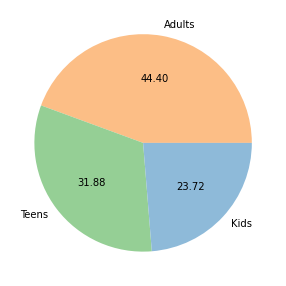

In [20]:
plt.figure(figsize=(5,5))
plt.pie(df['target_audience'].value_counts(),labels=['Adults','Teens','Kids'],colors=['#fcbe86','#95cf95','#8ebad9'],autopct='%.2f')
print(df['target_audience'].value_counts())

Adults    2065
Teens     1324
Kids       868
Name: target_audience, dtype: int64
Adults    694
Teens     657
Kids      606
Name: target_audience, dtype: int64


Text(0.5, 1.0, 'TV Shows Audience Distribution')

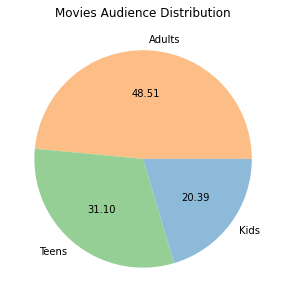

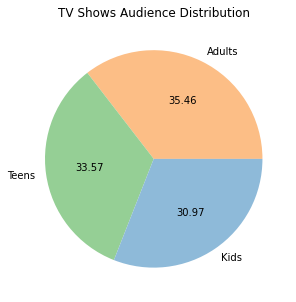

In [21]:
plt.figure(figsize=(5,5))
plt.pie(df[df['type']=='Movie']['target_audience'].value_counts(),labels=['Adults','Teens','Kids'],colors=['#fcbe86','#95cf95','#8ebad9'],autopct='%.2f')
print(df[df['type']=='Movie']['target_audience'].value_counts())
plt.title('Movies Audience Distribution')
plt.figure(figsize=(5,5))
plt.pie(df[df['type']=='TV Show']['target_audience'].value_counts(),labels=['Adults','Teens','Kids'],colors=['#fcbe86','#95cf95','#8ebad9'],autopct='%.2f')
print(df[df['type']=='TV Show']['target_audience'].value_counts())
plt.title('TV Shows Audience Distribution')

Text(0.5, 1.0, 'Content Ratings Histogram')

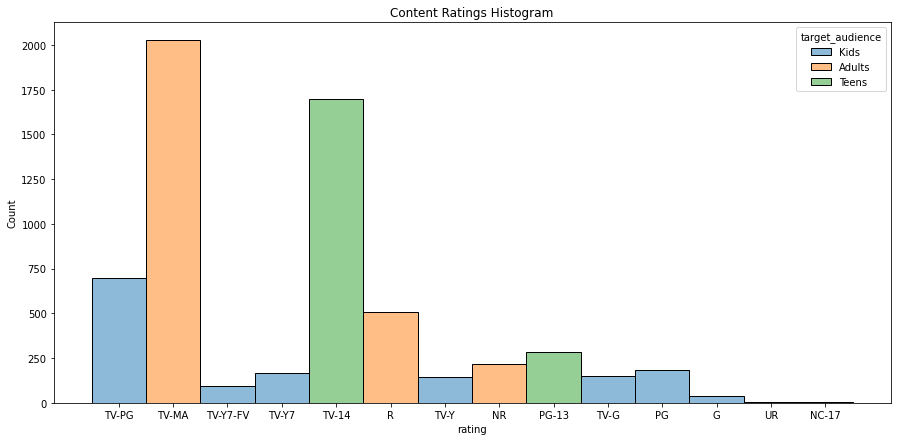

In [22]:
plt.figure(figsize=(15,7))
sns.histplot(data=df, x='rating',hue='target_audience',alpha=0.5)
plt.title('Content Ratings Histogram')

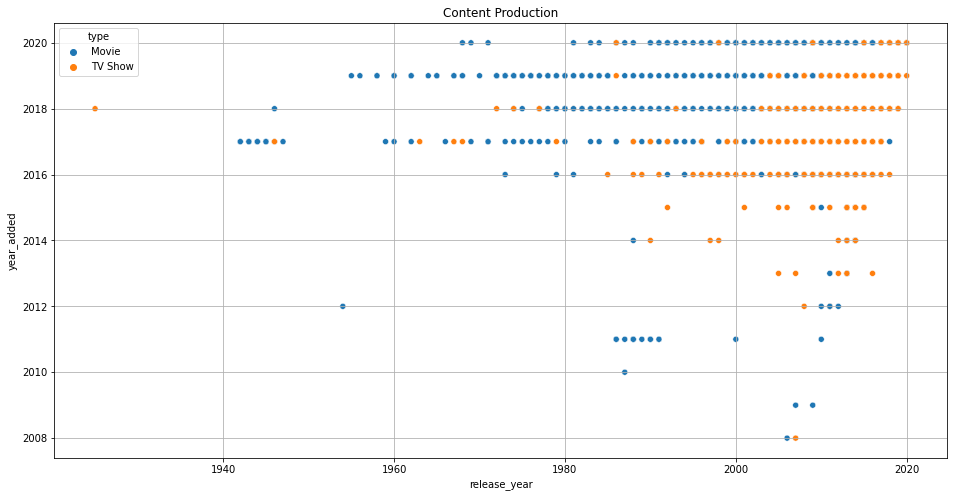

In [23]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df['release_year'],y=df['year_added'],hue=df['type'])
plt.title('Content Production')
plt.grid('on')

Movie      4257
TV Show    1957
Name: type, dtype: int64


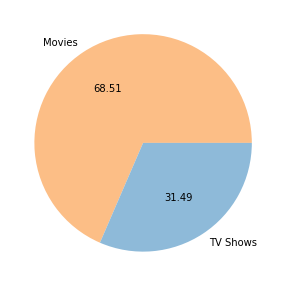

In [24]:
plt.figure(figsize=(5,5))
plt.pie(df['type'].value_counts(),labels=['Movies','TV Shows'],colors=['#fcbe86','#8ebad9'],autopct='%.2f')
print(df['type'].value_counts())

In [25]:
movie_genres_dict = {}
for i in df[df['type']=='Movie'].index:
    genres_list = df.loc[i]['genres']
    for genre in genres_list:
        genre=genre.lower()
        if movie_genres_dict.get(genre):
            movie_genres_dict[genre] = movie_genres_dict.get(genre) + 1
        else:
            movie_genres_dict[genre] = 1

movie_genres_df = pd.DataFrame(data={'genre':movie_genres_dict.keys(),'count':movie_genres_dict.values()})
movie_genres_df.head()

,genre,count
0,children,378
1,family movies,378
2,comedies,1113
3,stand-up comedy,281
4,international movies,1927


Text(0.5, 1.0, 'Movie Genres')

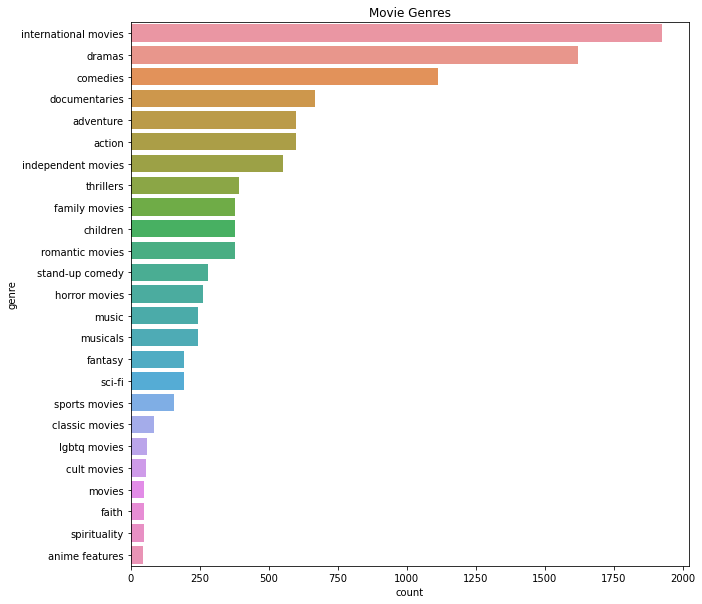

In [26]:
plt.figure(figsize=(10,10))
sns.barplot(data=movie_genres_df.sort_values(by='count',ascending=False),x='count',y='genre')
plt.title('Movie Genres')

In [27]:
tv_genres_dict = {}
for i in df[df['type']=='TV Show'].index:
    genres_list = df.loc[i]['genres']
    for genre in genres_list:
        genre=genre.lower()
        if tv_genres_dict.get(genre):
            tv_genres_dict[genre] = tv_genres_dict.get(genre) + 1
        else:
            tv_genres_dict[genre] = 1

tv_genres_df = pd.DataFrame(data={'genre':tv_genres_dict.keys(),'count':tv_genres_dict.values()})
tv_genres_df.head()

,genre,count
0,kids' tv,325
1,crime tv shows,362
2,international tv shows,999
3,spanish-language tv shows,116
4,docuseries,278


Text(0.5, 1.0, 'TV Show Genres')

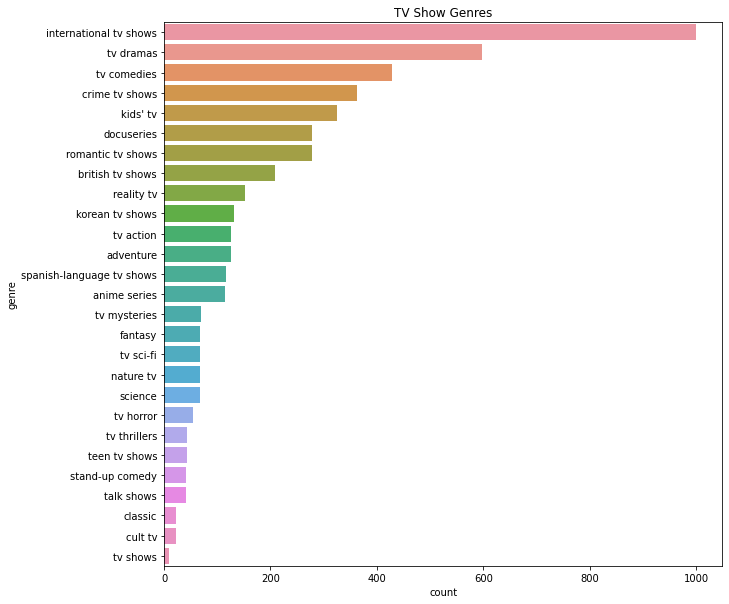

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(data=tv_genres_df.sort_values(by='count',ascending=False),x='count',y='genre')
plt.title('TV Show Genres')

(-0.5, 1679.5, 1679.5, -0.5)

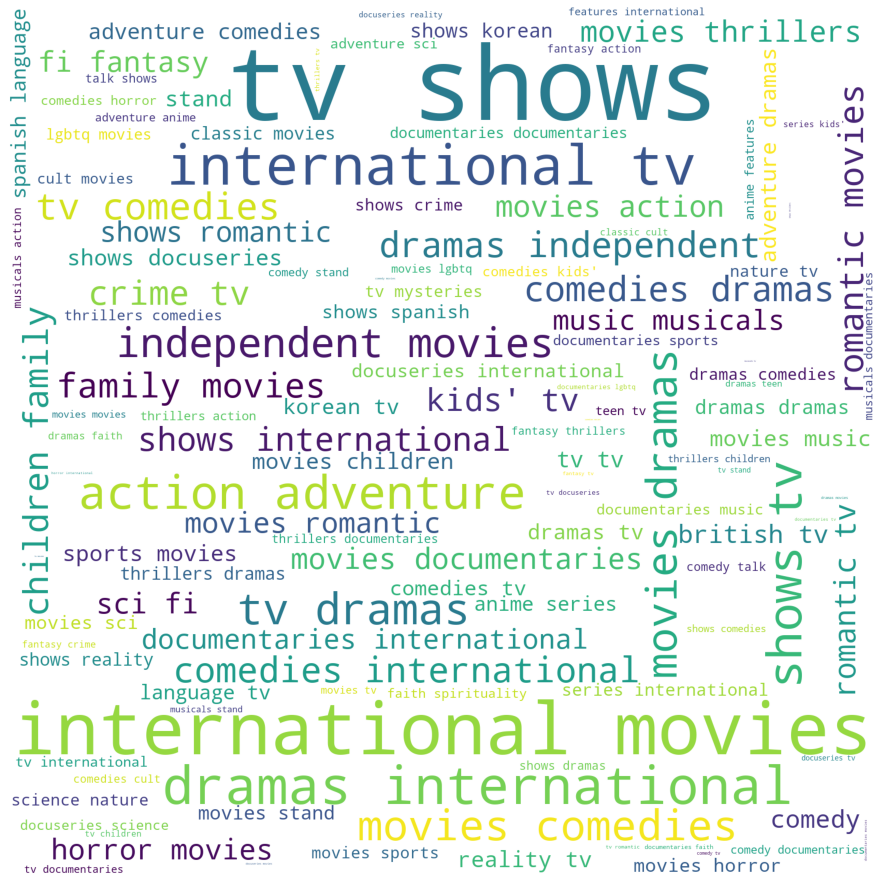

In [29]:
text = ""
for i in df.index:
    genres_list = df.loc[i]['genres']
    for genre in genres_list:
        genre=genre.lower()
        text += genre + ' '
        
wordcloud = WordCloud(background_color='white', width=1680, height=1680, max_words=150).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wordcloud)
plt.axis('off')